<a href="https://colab.research.google.com/github/Salma-Kassem/DeepLearning/blob/main/Copy_of_Task_1_Classification_using_SVMs_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Text Classification with SVM and Naive Bayes
In this notebook, you'll train two classifiers — SVM and Naive Bayes — on a real-world text dataset (20 Newsgroups).
You'll also visualize the data, compare results, and explore how both work like we did in the lab
```



In [ ]:
#Import your dataset, and extract training sub dataset

from sklearn.datasets import fetch_20newsgroups

categories = ['sci.space', 'rec.sport.hockey']
#sci.space (space science-related discussions)
#rec.sport.hockey (ice hockey sports discussions)
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
X_train = train_data.data        # list of document strings
y_train = train_data.target     # numeric labels

In [ ]:
#Try yourself: do the same for test_data to extract testing sub dataset we will use for prediction
#Hint: replace: subset='train' with the correct choice
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))
X_test = test_data.data        # list of document strings
y_test = test_data.target     # numeric labels

In [ ]:
#Optional: To help you understand what the data looks like
print ("length of X_train:",len(X_train))
print ("length of y_train:",len(y_train))
print ((X_train[0]),"/",(y_train[0]), "/", "name of the target class:",train_data.target_names[y_train[0]])

length of X_train: 1193
length of y_train: 1193
Individual leaders by total points (Final standings)
    NOTE: Games played and points per games not accurate !!

    Player       Team   GP  G   A  Pts ppg  Prj PIM +/-

    M.Lemieux    PIT    59  69  91 160 2.71 160  38  53
    LaFontaine   BUF    82  53  95 148 1.80 148  63  13
    Oates        BOS    83  45  97 142 1.71 142  32  12
    Yzerman      DET    83  58  79 137 1.65 137  44  33
    Turgeon      NYI    80  58  74 132 1.65 132  26  -2
    Selanne      WIN    82  76  56 132 1.61 132  45   6
    Mogilny      BUF    75  76  51 127 1.69 127  40   9
    Gilmour      TOR    81  32  95 127 1.57 127  96  32
    Robitaille   LA     82  63  62 125 1.52 127 100  16
    Recchi       PHI    81  53  70 123 1.52 123  95  -2
    Sundin       QUE    79  47  67 114 1.44 114  96  19
    Stevens      PIT    71  55  57 112 1.58 112 169  16
    Bure         VAN    82  60  50 110 1.34 110  67  37
    Tocchet      PIT    79  48  61 109 1.38 109 240  

In [ ]:
#Multinomial NB Block starter
#Hint: Revise the notebook we covered in lab 2

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train,y_train)


#model_nb= set the model to Multinomial NB as in lab 2
#train your model using model.fit function

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.pipeline import make_pipeline
model_tf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tf.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

**What does “vectorizing text” even mean? And why do we need it?**

❓ **What’s the problem?**

Machine learning models (like SVMs and Naive Bayes) can’t read words — they only understand numbers.
We need a way to convert text into numbers — that’s where vectorizers come in.

🧰 **Enter: Vectorizers.**

They take a sentence and turn it into a numeric vector, where each word gets a number.

CountVectorizer vs. TfidfVectorizer:
**1. CountVectorizer**

It’s the simplest one.

What does it do?

It counts how many times each word appears in the sentence.

Example:
If your sentence is "dear friend dear",
you’ll get:

dear: 2

friend: 1

Analogy:
Think of it like a grocery receipt — it just tells you how many of each word you "bought."

**2. TfidfVectorizer (Term Frequency–Inverse Document Frequency)**

It’s smarter.

What does it do?
It also counts the words — but it reduces the importance of words that appear too often in all documents (like "the", "and", or "dear").

Why?
Because words that are too common don’t help us tell categories apart. They’re like background noise.

Analogy:
Think of it like giving rare words a louder voice, and common words a quieter voice.

**Which one should we use?**

CountVectorizer: Simpler, good for small and clear datasets.

TfidfVectorizer: Better for real-world text (emails, news, etc.) where some words appear too often to be useful.

In [ ]:
#Predict and evaluate using accuracy score

from sklearn.metrics import accuracy_score
#write your code here
#Hint: use model.predict
predict =model.predict(X_test)
print(f"Test accuracy for Multinomial NB:",accuracy_score(y_test,predict))

Test accuracy for Multinomial NB: 0.9470365699873896


In [ ]:
#optional to see what test data looks like
print ((test_data.data[0]),"/",(test_data.target[0]), "/", "name of the target class:",test_data.target_names[test_data.target[0]])


Speaking of which, a paper was out a few years ago about a
weather sat imaging a lunar eclipse -- are those images
uploaded anywhere?  I could dig out the reference if there's interest.

Shag

--  / 1 / name of the target class: sci.space


In [ ]:
#Part 2: SVMS


**Why are we plotting the text data before training?**

Let’s break it down step-by-step:

**What’s the goal?**
We want to decide whether to use a linear SVM or a non-linear (e.g., RBF) SVM.

**How do we decide?**
By looking at the data — if the classes (categories) look linearly separable (like you could draw a straight line between them), we can use a linear SVM.
If the data is more mixed or swirly, an RBF kernel might do better.

**Why can’t we just plot the data directly?**
Because our inputs are text, not numbers.
To plot anything, we need numeric vectors — and text needs to be vectorized first.

**How do we convert the text to vectors?**
We use TfidfVectorizer() — this turns text into high-dimensional numeric vectors (one value per word). But we can’t plot in 1000D — we need 2D.

**So how do we go from text → 2D?**

TfidfVectorizer() → converts text into word-based numerical vectors

TruncatedSVD(n_components=2) → reduces those vectors into 2 dimensions (x and y)

Now we can plot the points and color them by label to see if a linear separation is possible

**What’s next in the code below?**
You’ll see how we:

1-Vectorize the training data

2-Project it into 2D space

3- Fit an RBF SVM to see how the decision boundary might look

4- Plot the 2D points colored by class

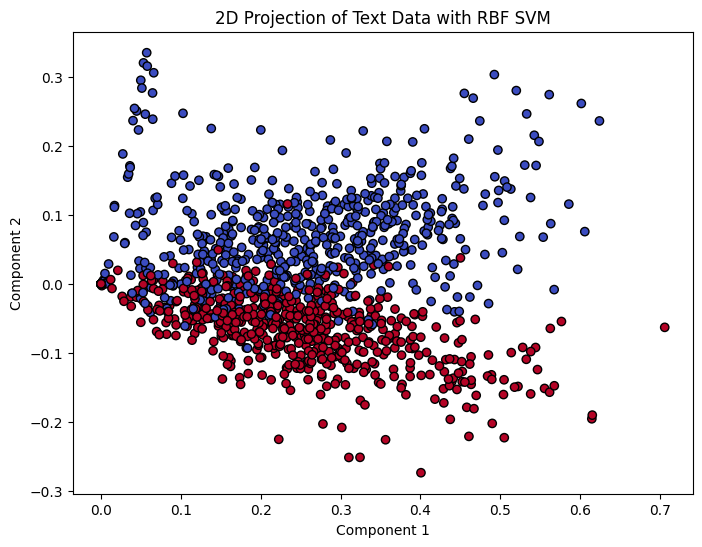

In [ ]:
# (Optional) Visualize data with dimensionality reduction (SVD → 2D)
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Pipeline: vectorize → reduce to 2D → train SVM
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X_train)

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_vec)

model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_2d, y_train)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("2D Projection of Text Data with RBF SVM")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert text into numerical features
vectorizer = TfidfVectorizer()  # or CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Linear SVM
model_svm_linear = SVC(kernel='linear', C=1e5)
model_svm_linear.fit(X_train_vec, y_train)
y_pred_svm_linear = model_svm_linear.predict(X_test_vec)
accuracy_linear = accuracy_score(y_test, y_pred_svm_linear)

# RBF SVM with scaling
model_svm_rbf = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='rbf', C=1, gamma='auto'))
model_svm_rbf.fit(X_train_vec, y_train)
y_pred_svm_rbf = model_svm_rbf.predict(X_test_vec)
accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)

print("SVM Accuracy using linear:", accuracy_linear)
print("SVM Accuracy using RBF:", accuracy_rbf)


SVM Accuracy using linear: 0.9394703656998739
SVM Accuracy using RBF: 0.626733921815889


In [ ]:
#Try CountVectorizer with SVM instead (linear or RBF). Does your model’s accuracy change? Why do you think that is?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec2 = vectorizer.fit_transform(X_train)
X_test_vec2 = vectorizer.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM
model_linear2 = SVC(kernel='linear', C=1)
model_linear2.fit(X_train_vec2, y_train)
y_pred_linear2 = model_linear2.predict(X_test_vec)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear2))

# RBF SVM (with scaling)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_rbf2 = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='rbf', C=1, gamma='auto'))
model_rbf2.fit(X_train_vec2, y_train)
y_pred_rbf2 = model_rbf2.predict(X_test_vec2)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf2))


Linear SVM Accuracy: 0.5977301387137453
RBF SVM Accuracy: 0.6204287515762925
